## Example 4: Combining several images 

<pre> Máster en Astrofísica UCM -- Técnicas Experimentales en Astrofísica
Jaime Zamorano and Nicolás Cardiel

This notebook has reproduced parts of the STAK project notebook:
 - https://stak-notebooks.readthedocs.io/en/latest/index.html 

and the astropy tutorials: http://learn.astropy.org/FITS-images.html (by Lia R. Corrales)

v0  2020/05/12 to be completed
v1  2021/01/10 almost ready for 2020/21
</pre>

Note that the ``astropy`` package should be installed. In this sense, have a look to the
astropy installation description: https://docs.astropy.org/en/stable/install.html.
We are also using ``ccdproc`` package.

In [30]:
from astropy.io import fits
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ccdproc import CCDData, Combiner

In [31]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, image_data, x1, x2, y1, y2, color, text=False):
    ax.plot((x1, x1), (y1, y2), color, lw=1)
    ax.plot((x2, x2), (y1, y2), color, lw=1)
    ax.plot((x1, x2), (y1, y1), color, lw=1)
    ax.plot((x1, x2), (y2, y2), color, lw=1)
    if text:
        media = image_data[y1:y2,x1:x2].mean()
        std   = image_data[y1:y2,x1:x2].std()
        ax.text((x1+x2)/2, y1, str(int(media)), 
                ha='center', va='top', color=color, fontsize=15)        
        ax.text((x1+x2)/2, y2, str(int(std)), 
                ha='center', va='bottom', color=color, fontsize=15)
    return media,std

### Opening the FITS files to be combined

**List of files to be combined**

These are three consecutive images of M51 in Johnson R band taken with CAFOS at Calar Alto.

In [32]:
directory = 'FITS_files/'
filename = 'ucmP_0052.fits'
imagen = fits.getdata(directory+filename)
header = fits.getheader(directory+filename)
exposure = header['EXPTIME']
print(header['FILENAME'],header['OBJECT'],
      header['INSFLNAM'],header['EXPTIME'],
      int(np.mean(imagen)),int(np.std(imagen)),
      np.min(imagen), np.max(imagen))


ucmP_0052.fits M51 CousinsR 200.0 2193 2052 0 65535


Text(1000, 10, '200.0')

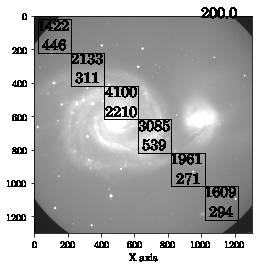

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = ax.imshow(imagen, cmap='gray', vmin=500, vmax=5000,norm=LogNorm())
ax.set_xlabel('X axis')
x_pos, y_pos = 20,20
step = 200
for i in range(6):
    x1 = int(x_pos + i * step)
    x2 = x1 + step
    draw_rectangle(ax, imagen , x1,x2,x1,x2, color='k',text=True)
ax.text(1000,10,exposure,fontsize=15)

In [34]:
directory = 'FITS_files/'
files = ['ucmP_0050.fits','ucmP_0051.fits','ucmP_0052.fits','ucmP_0053.fits']

Oppening the FITS files and putting the data into a list of numpy 2-D arrays.

In [35]:
image = []
exposure = []
for i in range(len(files)):
    image.append(fits.getdata(directory+files[i]))
# If you need to browse the header
#fits.getheader(directory+files[0])

Each image is now stored as a 2-D numpy arrays inside a list. 
Want to know the dimensions of the image? Just look at the shape of the array.

In [36]:
print(type(image[0]))
print(image[1].shape)
print((image[2].shape)[0])
print((image[1].shape)[1])

<class 'numpy.ndarray'>
(1301, 1301)
1301
1301


### Analysing the images data

Let us get some basic statistics about our images

In [37]:
print('Filename    Object  Filter   Mean  std min  max')
for i in range(len(files)):
    header = fits.getheader(directory+files[i])
    exposure.append(header['EXPTIME'])
    print(header['FILENAME'],header['OBJECT'],header['INSFLNAM'],header['EXPTIME'],int(np.mean(image[i])),int(np.std(image[i])),np.min(image[i]), np.max(image[i]), )

Filename    Object  Filter   Mean  std min  max
ucmP_0050.fits M51 CousinsR 500.0 4620 3372 0 65535
ucmP_0051.fits M51 CousinsR 300.0 2998 2542 0 65535
ucmP_0052.fits M51 CousinsR 200.0 2193 2052 0 65535
ucmP_0053.fits M51 CousinsR 200.0 2202 2058 0 65535


#### Plotting a histogram

To make a histogram with ``matplotlib.pyplot.hist()``, we need to cast the data from a 2-D to array to something one dimensional.
In this case, we are am using ``ndarray.flatten()`` to return a 1-D numpy array.

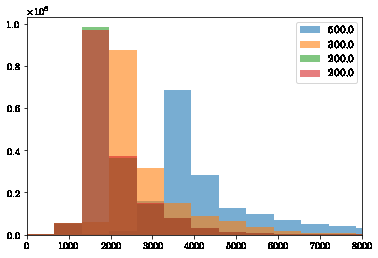

In [38]:
plt.xlim(0,8000)
for i in range(len(files)):
    plt.hist(image[i].flatten(), alpha=0.6, bins=100, label=exposure[i])
plt.legend()
plt.show()

As expected first image (exposure of 500s) has more signal than the next ones. The exposure time of the last two images is 200s, and the histograms are similar. 

Let display the four images with the same background and foreground limit values.

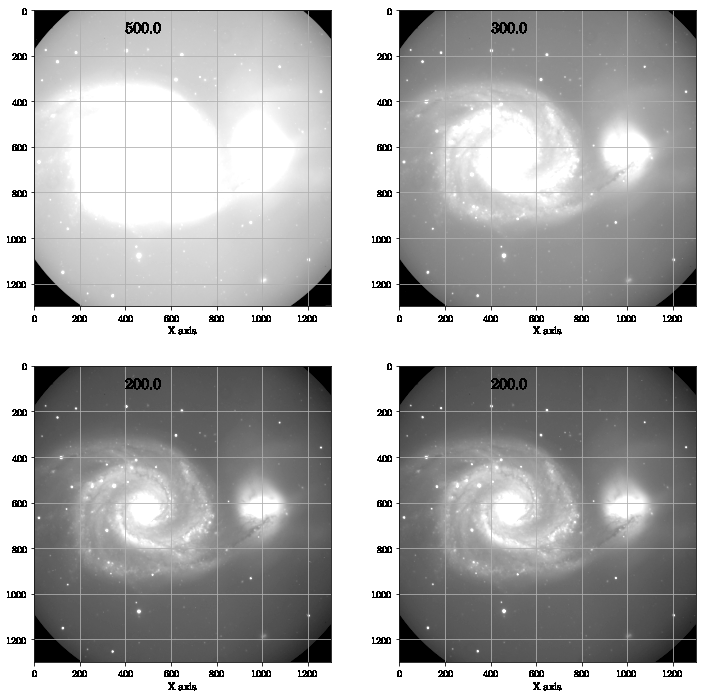

In [39]:
#plt.imshow(image[0], cmap='gray', vmin=1000, vmax=5000,norm=LogNorm())
#plt.show()
fig, axarr = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
i,j=0,0
for n in range(0,4):
    ax = axarr[j,i]
    ax.imshow(image[n], cmap='gray', vmin=1000, vmax=5000,norm=LogNorm())
    ax.text(400,100,exposure[n],fontsize=15)
    ax.set_xlabel('X axis')
    ax.grid()
    i = i+1
    if i==2 :
        i=0
        j=1
    

In [40]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, image_data, x1, x2, y1, y2, color, text=False):
    ax.plot((x1, x1), (y1, y2), color, lw=1)
    ax.plot((x2, x2), (y1, y2), color, lw=1)
    ax.plot((x1, x2), (y1, y1), color, lw=1)
    ax.plot((x1, x2), (y2, y2), color, lw=1)
    if text:
        media = image_data[y1:y2,x1:x2].mean()
        std   = image_data[y1:y2,x1:x2].std()
        ax.text((x1+x2)/2, y1, str(int(media)), 
                ha='center', va='top', color=color, fontsize=15)        
        ax.text((x1+x2)/2, y2, str(int(std)), 
                ha='center', va='bottom', color=color, fontsize=15)
    return media,std

### Estimating DARK value

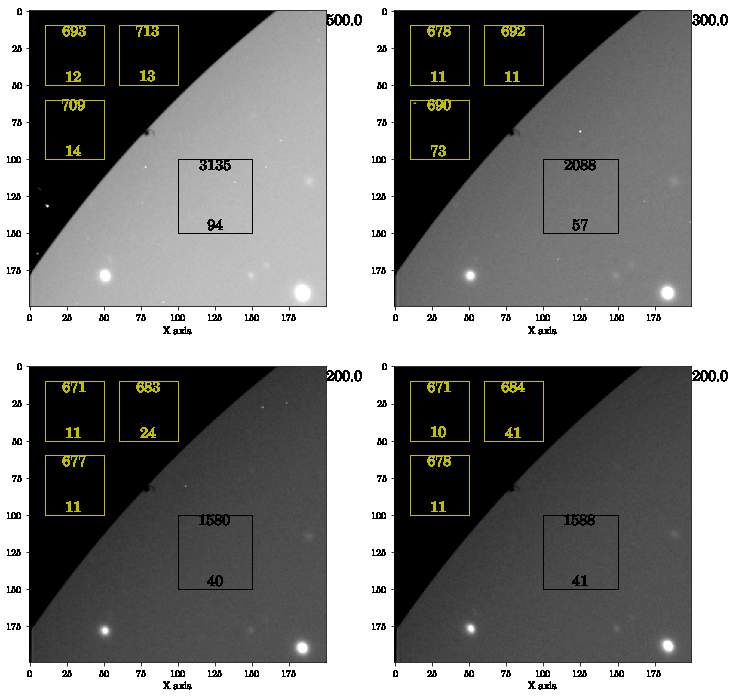

In [41]:
dark_mean,std= [],[]
fig, axarr = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
i,j=0,0
for n in range(0,4):
    ax = axarr[j,i]
    box = image[n][0:200,0:200]
    img = ax.imshow(box, cmap='gray', vmin=1000, vmax=5000,norm=LogNorm())
    ax.set_xlabel('X axis')
    mean_n,std_n= draw_rectangle(ax, box , 10, 50, 10, 50, color='y',text=True)
    dark_mean.append(mean_n)
    std.append(std_n)
    draw_rectangle(ax, box , 60, 100, 10, 50, color='y',text=True)
    draw_rectangle(ax, box , 10, 50, 60, 100, color='y',text=True)
    draw_rectangle(ax, box , 100, 150, 100, 150, color='k',text=True)
    ax.text(200,10,exposure[n],fontsize=15)
    i = i+1
    if i==2 :
        i=0
        j=1

In [42]:
for n in range(0,4):
    print(files[n],exposure[n],int(dark_mean[n]),int(std[n]))

ucmP_0050.fits 500.0 693 12
ucmP_0051.fits 300.0 678 11
ucmP_0052.fits 200.0 671 11
ucmP_0053.fits 200.0 671 10


BIAS=  657.01 noise= 0.07331 counts/s


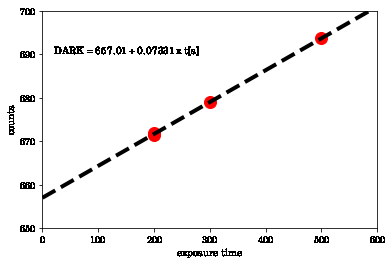

In [43]:
from scipy.optimize import curve_fit
plt.xlim(0,600)
plt.ylim(650,700)
x,y,noise = np.array(exposure),np.array(dark_mean),np.array(std)
def func(x, a, b):
    return a + b*x 
popt, pcov = curve_fit(func, x, y, sigma=1./(noise*noise))
a,b = round(popt[0],3),round(popt[1],5)
print('BIAS= ',a,'noise=',b,'counts/s')
xx = np.linspace(0,600,100)
yy = func(xx,a,b)
plt.plot(x, y, 'ro',ms=12) 
plt.xlabel('exposure time')
plt.ylabel('counts')
plt.plot(xx,yy,'k--',lw=4)
plt.text(20,690,'DARK = '+str(a)+' + '+str(b)+' x t[s]')
plt.show()

In [44]:
zimage = []
for i in range(0,4):
    zimage.append(image[i] - dark_mean[i])   
for i in range(0,4):
    print(int(image[i].mean()),int(dark_mean[i]),int(zimage[i].mean()))

4620 693 3927
2998 678 2319
2193 671 1521
2202 671 1530


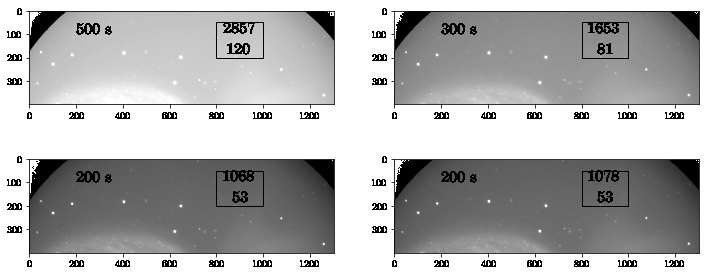

In [45]:
sky_mean,std= [],[]
fig, axarr = plt.subplots(ncols=2, nrows=2, figsize=(12, 5))
i,j=0,0
for n in range(0,4):
    ax = axarr[j,i]
    box = zimage[n][0:400,:]
    img = ax.imshow(box, cmap='gray', vmin=400, vmax=5000,norm=LogNorm())
    mean_n,std_n= draw_rectangle(ax, box , 800, 1000, 50, 200, color='k',text=True)
    sky_mean.append(mean_n)
    std.append(std_n)
    ax.text(200,100,str(int(exposure[n]))+' s',fontsize=15)
    i = i+1
    if i==2 :
        i=0
        j=1

#### Checking sky brightness versus time

5.606 counts/s


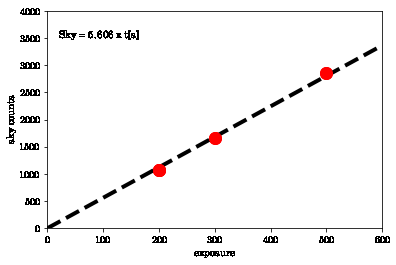

In [46]:
plt.plot(exposure,sky_mean,'gs')
plt.xlabel('exposure')
plt.ylabel('sky counts')
plt.xlim(0,600)
plt.ylim(0,4000)

x,y = np.array(exposure),np.array(sky_mean)
plt.plot(x, y, 'ro',ms=12) 

def func(x, b):
    return b*x 
popt, pcov = curve_fit(func, x, y)
b = round(popt[0],3)
print(b,'counts/s')
xx = np.linspace(0,600,100)
yy = func(xx,b)
plt.plot(xx,yy,'k--',lw=4)
plt.plot(x, y, 'ro',ms=12) 
plt.text(20,3500,'Sky = '+str(b)+' x t[s]')
plt.show()

### Combining the individual images

In [59]:
# Converting numpy arrays to CCDData objects
ccd = []
for i in range(len(zimage)):
    ccd.append(CCDData(zimage[i],unit='adu'))
    
# Combiner is a class for combining CCDData objects.
# https://ccdproc.readthedocs.io/en/latest/api/ccdproc.Combiner.html
# The Combiner class is used to combine together CCDData objects 
# including the method for combining the data, rejecting outlying data, 
# and weighting used for combining frames.
combiner = Combiner(ccd)

As the images have different exposure times we must scale the signal to combine the individual images
https://ccdproc.readthedocs.io/en/latest/api/ccdproc.Combiner.html#ccdproc.Combiner.scaling

In [60]:
scaling_func = lambda arr: 1/np.ma.average(arr)
combiner.scaling = scaling_func

Preguntar a Nicolás

In [61]:
# median combine 
combined_image_average_scaled = combiner.average_combine()
# median combine 
combined_image_median = combiner.median_combine()

### Writing the resulting file

We can use the ``writeto`` method to save the new file. 
Note that ``writeto`` will close the new file for you.

In [62]:
# Extract primary header from single file and copy into new combined file header
HDUList_object = fits.open(directory+files[0])
combined_image_median.header = HDUList_object[0].header

In [63]:
# Replace FILENAME keyword and add information
combined_image_median.header['FILENAME'] = 'M51_new.fits' 
combined_image_median.header['HISTORY'] = 'median combining '+ str(len(files)) + 'images'
combined_image_median.header['HISTORY'] = 'individual images from ' + str(files[0])+' to ' + str(files[-1])


In [64]:
# Finally writte the image to a FITS file. 
# An error occurs when the file already exits (use overwrite='yes' to avoid the error)
combined_image_median.write('M51_new.fits',overwrite='yes')